In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import EarlyStopping

# Define your class names
class_names = ['african-wildcat', 'blackfoot-cat', 'chinese-mountain-cat', 'domestic-cat', 'european-wildcat', 'jungle-cat', 'sand-cat']

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

training_set = train_datagen.flow_from_directory(
    'dataset',
    target_size=(227, 227),
    batch_size=32,
    subset='training',
    class_mode='categorical',
    seed=64
)

test_set = train_datagen.flow_from_directory(
    'dataset',
    target_size=(227, 227),
    batch_size=32,
    subset='validation',
    class_mode='categorical',
    seed=64
)

vgg_model = Sequential()
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(227, 227, 3))

vgg.trainable = True
for layer in vgg.layers[:15]:
    layer.trainable = False

vgg_model.add(vgg)
vgg_model.add(GlobalAveragePooling2D())
vgg_model.add(Dense(units=512, activation='relu'))
vgg_model.add(Dropout(0.5))  # Increase dropout rate
vgg_model.add(Dense(units=len(class_names), activation='softmax'))  # Adjust output units

import keras
opt = Adam(learning_rate=0.0001)  # Adjust learning rate
vgg_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Found 367 images belonging to 7 classes.
Found 152 images belonging to 7 classes.


In [25]:
vgg_model.evaluate(test_set)

5/5 [==============================] - 18s 3s/step - loss: 0.8959 - accuracy: 0.7303


[0.8959330320358276, 0.7302631735801697]

In [2]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
history=vgg_model.fit(training_set, batch_size=8, epochs=50, validation_data=test_set, callbacks=[early_stopping])

Epoch 1/50
12/12 [==============================] - 81s 7s/step - loss: 1.9772 - accuracy: 0.2098 - val_loss: 1.7920 - val_accuracy: 0.3092
Epoch 2/50
12/12 [==============================] - 93s 8s/step - loss: 1.7370 - accuracy: 0.3161 - val_loss: 1.6062 - val_accuracy: 0.4211
Epoch 3/50
12/12 [==============================] - 84s 7s/step - loss: 1.5303 - accuracy: 0.3787 - val_loss: 1.4430 - val_accuracy: 0.4671
Epoch 4/50
12/12 [==============================] - 84s 7s/step - loss: 1.3939 - accuracy: 0.4360 - val_loss: 1.3932 - val_accuracy: 0.4803
Epoch 5/50
12/12 [==============================] - 82s 7s/step - loss: 1.2012 - accuracy: 0.5749 - val_loss: 1.3036 - val_accuracy: 0.4671
Epoch 6/50
12/12 [==============================] - 86s 7s/step - loss: 1.0482 - accuracy: 0.6049 - val_loss: 1.2010 - val_accuracy: 0.5132
Epoch 7/50
12/12 [==============================] - 86s 7s/step - loss: 1.0033 - accuracy: 0.6403 - val_loss: 1.1265 - val_accuracy: 0.6447
Epoch 8/50
12/12 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


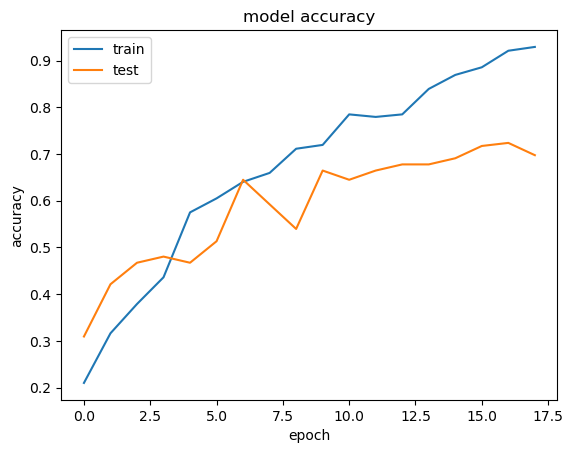

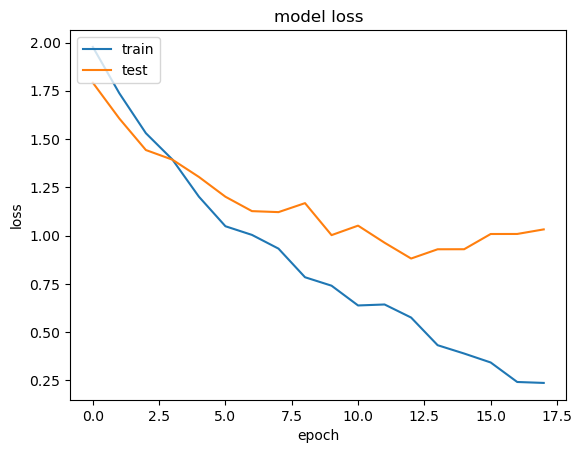

In [4]:

import matplotlib.pyplot as plt
# list all data in history


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()